# Pose Detection of me playing tennis

## Importing libraries

In [74]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

## Defining body parts

In [75]:
# defining all the body parts
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }
# defining all the pairs of body parts
POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

## Building network

In [76]:
# defining image width
image_width = 600
# defining image height
image_height = 600
# importing network
network = cv.dnn.readNetFromTensorflow("graph_opt.pb")

## Loading images

In [77]:
# reading image
img = cv.imread('adib-tennis.jpeg',cv.IMREAD_UNCHANGED)
# saving image shape
img_height, img_width = img.shape[:2]

## Detecting poses

In [78]:
# converting image to blob
blob = cv.dnn.blobFromImage(img, 1.0, (image_width, image_height), (127.5, 127.5, 127.5), swapRB=True, crop=False)
# putting the image blob into the network
network.setInput(blob)
# saving network output
output = network.forward()[:, :19, :, :]

## Assigning body parts

In [79]:
# defining threshold limit
threshold=0.2
# empty list of 2D points
points = []
for i in range(len(BODY_PARTS)):
    # slicing heatmap of corresponging body's part
    heatMap = output[0, i, :, :]
    confidence, point = cv.minMaxLoc(heatMap)[1], cv.minMaxLoc(heatMap)[3]
    x = (img_width * point[0]) / output.shape[3]
    y = (img_height * point[1]) / output.shape[2]
    # adding a point if it's confidence is higher than threshold
    points.append((int(x), int(y)) if confidence > threshold else None)

## Joining body parts

In [80]:
# making pairs of body parts and joining one part to another with lines
for pair in POSE_PAIRS:
    # saving the 2 components of a pair of body parts
    partFrom, partTo = pair[:2]
    # saving the id of those 2 components
    idFrom, idTo = BODY_PARTS[partFrom], BODY_PARTS[partTo]
    # drawing the figures on the image
    if points[idFrom] and points[idTo]:
        # drawing a line between the 2 points
        cv.line(img, points[idFrom], points[idTo], (0, 255, 0), 3)
        # drawing an ellipse on the first point
        cv.ellipse(img, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
        # drawing an ellipse on the second point
        cv.ellipse(img, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

## Showing ouput image

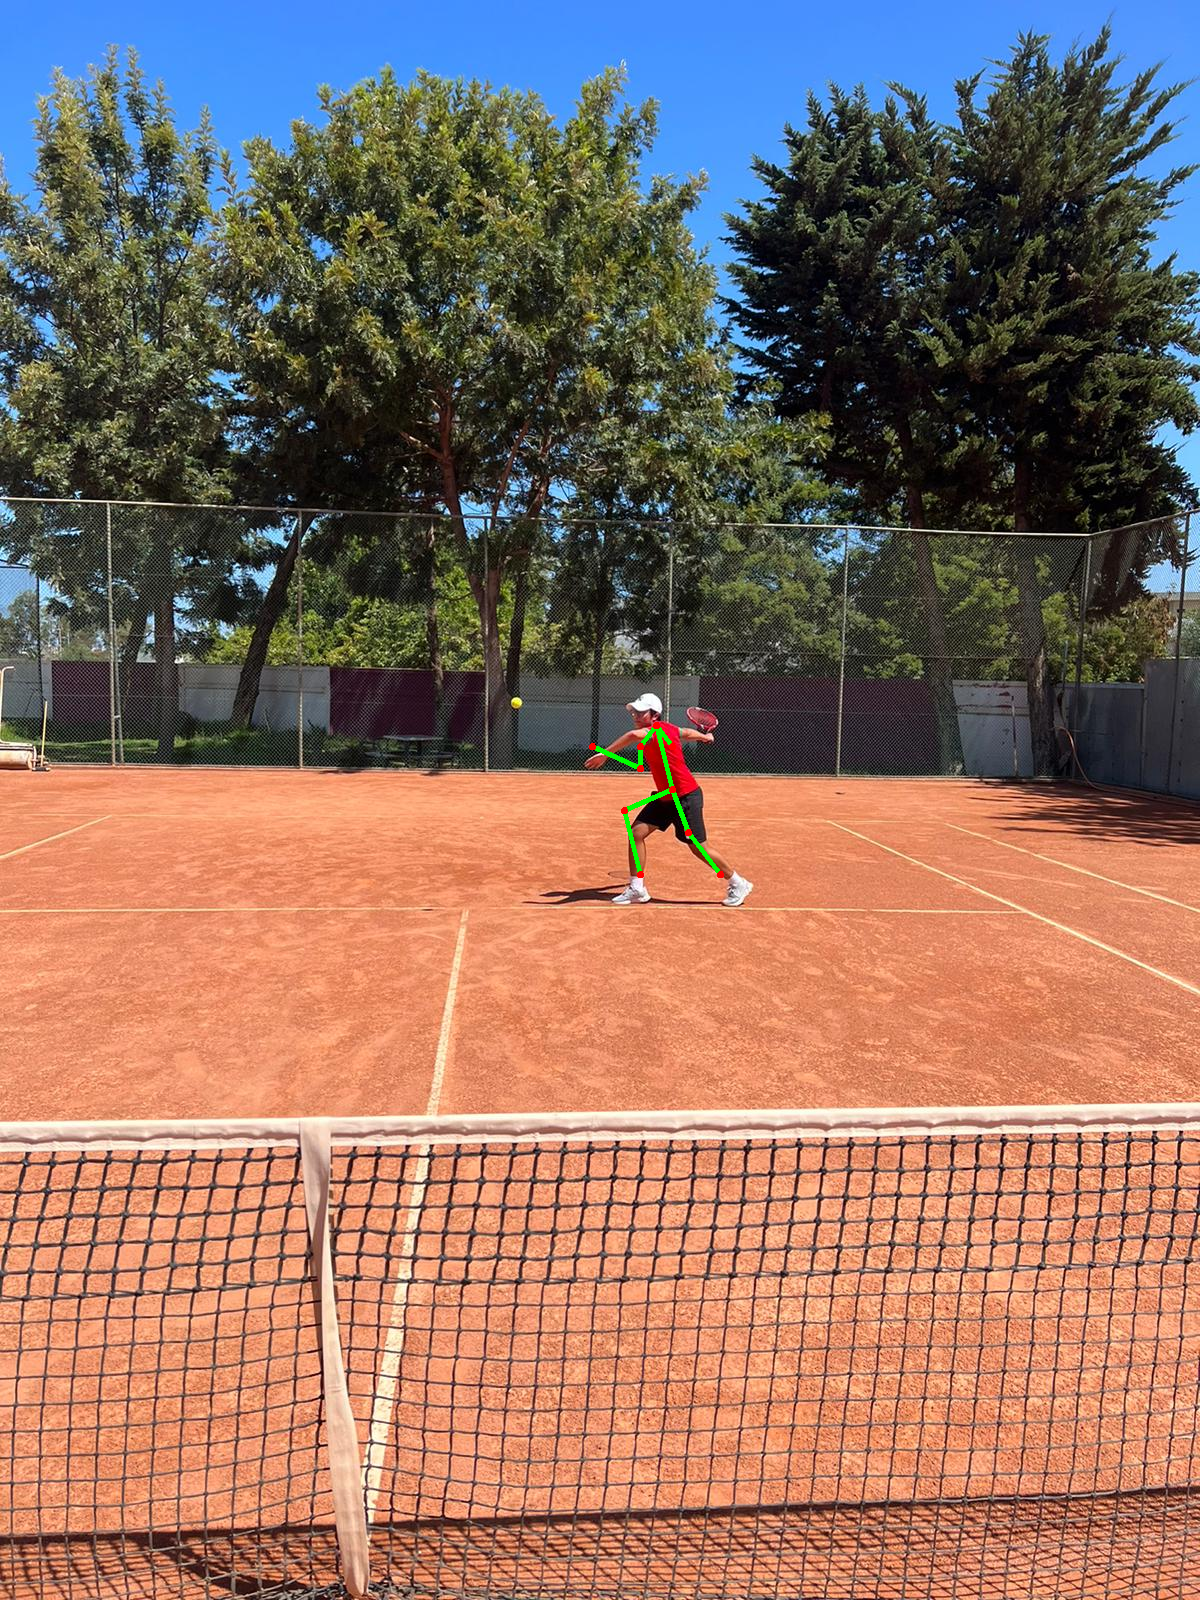

In [81]:
# displaying the image
cv2_imshow(img)
# waiting for user to press any key 
cv.waitKey(2) 
# closing all open windows 
cv.destroyAllWindows() 